In [3]:
!pip install seaborn
!pip install pandas

In [ ]:
!pip uninstall -y opencv-python-headless

In [ ]:
!pip uninstall -y opencv-python
!pip install opencv-python

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings
import tensorflow as tf 

import multiprocessing as mp
import os

warnings. filterwarnings('ignore')

def  color_print(print_str,
                 print_color='green'):

    '''print in given  color (default green)'''
    print(colored(print_str,print_color))

2024-03-25 19:41:50.448015: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 19:41:50.448125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 19:41:50.730678: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# import tensorflow as tf

# print("Tensorflow version " + tf.__version__)
# AUTO = tf.data.experimental.AUTOTUNE

# # Detect TPU, return appropriate distribution strategy
# try:
#     tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
#     print('Running on TPU ', tpu.master())
# except ValueError:
#     tpu = None

# if tpu:
#     tf.config.experimental_connect_to_cluster(tpu)
#     tf.tpu.experimental.initialize_tpu_system(tpu)
#     strategy = tf.distribute.experimental.TPUStrategy(tpu)
# else:
#     strategy = tf.distribute.get_strategy() 

# print("REPLICAS: ", strategy.num_replicas_in_sync)

In [5]:
device = "GPU" if tf.config.experimental.list_physical_devices("GPU") else "CPU"
device

'GPU'

In [5]:
gt_path = '/kaggle/input/soil-hyperspectral-images/train_data/train_data/train_gt.csv'
wavelength_path = '/kaggle/input/soil-hyperspectral-images/train_data/train_data/wavelengths.csv'

In [6]:
gt_df = pd.read_csv(gt_path)
wavelength_df = pd.read_csv(wavelength_path)

In [7]:
classes = ['P','K','Mg','pH']

In [8]:
def load_npz_file(filepath, masked, pad_mask):
    with np.load(filepath) as npz:
      arr = np.ma.MaskedArray(**npz)

    if masked == True:
      if pad_mask : # pad masked pixels with 0's to preserve shape
        mask = arr.mask
        return np.where(mask==True,0,arr.data)

    return arr

In [9]:
def load_and_reshape(filepath):
    '''load and reshape array'''

    arr = load_npz_file(filepath,
                        masked=False,
                        pad_mask=False)

    index = filepath.split('/')[-1].split(sep='.')[0]

    depth,height,width = arr.shape
    arr = arr.reshape((height, width, depth))
    
    return arr

In [10]:
# hyperspectral image tiles
train_tiles_folder = '/kaggle/input/soil-hyperspectral-images/train_data/train_data/train_data'

In [11]:
#adding paths to train_gt csv
gt_df['paths'] = train_tiles_folder + '/' + gt_df['sample_index'].astype(str) + '.npz'

#check if all the paths exists

all([os.path.exists(path) for path in gt_df['paths']])

True

In [13]:
load_and_reshape(gt_df['paths'][1731]).shape

(119, 124, 150)

In [14]:
load_and_reshape(gt_df['paths'][0]).shape

(11, 11, 150)

In [ ]:
# To check the least size of images
# min_h = 1000000
# min_w = 1000000
# for i in range(len(gt_df['paths'])):
#     h, w, d = load_and_reshape(gt_df['paths'][i]).shape
#     if h < min_h:
#         min_h = h
#     if h < min_w:
#         min_w = w

# print(min_h, min_w)

## Checking Data Sizes

In [20]:
sizes_set = set()
for i in range(len(gt_df['paths'])):
    h, w, d = load_and_reshape(gt_df['paths'][i]).shape
    if (h,w) not in sizes_set:
        sizes_set.add((h,w))

sorted_list = sorted(sizes_set, key=lambda x: sum(x))
for element in sorted_list:
    print(element)

(11, 11)
(33, 24)
(21, 37)
(21, 38)
(25, 36)
(24, 37)
(25, 37)
(23, 40)
(29, 35)
(28, 37)
(39, 26)
(28, 38)
(29, 37)
(27, 41)
(24, 46)
(33, 38)
(34, 38)
(26, 46)
(35, 37)
(30, 42)
(34, 39)
(35, 38)
(29, 45)
(36, 38)
(31, 43)
(26, 48)
(35, 39)
(39, 35)
(40, 37)
(37, 40)
(42, 36)
(33, 46)
(39, 40)
(53, 26)
(39, 41)
(40, 41)
(43, 38)
(41, 42)
(42, 41)
(39, 44)
(56, 27)
(40, 44)
(42, 42)
(46, 38)
(42, 43)
(43, 42)
(38, 47)
(42, 44)
(36, 50)
(43, 43)
(43, 44)
(46, 41)
(45, 42)
(40, 47)
(16, 71)
(42, 45)
(65, 22)
(48, 40)
(43, 45)
(47, 41)
(44, 44)
(46, 42)
(41, 48)
(45, 44)
(44, 46)
(43, 47)
(43, 48)
(42, 49)
(44, 48)
(47, 46)
(45, 48)
(49, 44)
(46, 47)
(47, 47)
(49, 45)
(43, 51)
(31, 63)
(46, 48)
(47, 48)
(61, 34)
(46, 49)
(45, 50)
(68, 27)
(50, 46)
(49, 47)
(25, 71)
(47, 51)
(48, 50)
(33, 67)
(34, 69)
(68, 38)
(69, 39)
(17, 93)
(60, 52)
(68, 45)
(51, 62)
(48, 67)
(65, 51)
(63, 56)
(58, 61)
(56, 63)
(19, 107)
(64, 62)
(83, 59)
(56, 95)
(47, 104)
(90, 61)
(62, 93)
(71, 85)
(96, 61)
(88, 71)

In [21]:
len(sorted_list)

583

In [12]:
def visual_rep(arr, band_id):

#     arr = load_npz_file(path, masked=False, pad_mask=False)
    color_print(f'Shape of the selected sample image {arr.shape} (height, width, channels)')

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    wavelen = wavelength_df.loc[band_id-1]

    axs[0].imshow(arr[:, :, band_id].data)
    plt.axis('off')
    axs[0].set_title('Un masked array')

    axs[1].imshow(arr[:, :, band_id])
    plt.axis('off')
    axs[1].set_title('masked array')

    plt.suptitle(f'Representation of band {int(wavelen["band_no"])} ({wavelen["wavelength"]} nm)', fontsize=15)
    plt.show()

## Resizing one image

Lossy Resizing

In [ ]:
hyperspectral_image = load_and_reshape(gt_df['paths'][1731])

# Convert the hyperspectral image to a TensorFlow tensor
hyperspectral_tensor = tf.convert_to_tensor(hyperspectral_image, dtype=tf.float32)

# Reshape the tensor to add a batch dimension
hyperspectral_tensor = tf.expand_dims(hyperspectral_tensor, axis=0)

# Resize the hyperspectral image to 11x11 using TensorFlow
resized_hyperspectral_tensor = tf.image.resize(hyperspectral_tensor, size=(11, 11))

# Remove the batch dimension and convert the resized tensor back to a numpy array
resized_hyperspectral_image = resized_hyperspectral_tensor.numpy()[0]

# Print the shape of the resized hyperspectral image
print("Original image shape:", hyperspectral_image.shape, "\nResized hyperspectral image shape:", resized_hyperspectral_image.shape)

In [ ]:
visual_rep(hyperspectral_image, 1)

In [ ]:
visual_rep(resized_hyperspectral_image, 1)

## Resizing all images

In [ ]:
resized_images = []

for path in gt_df['paths']:
    # Load and reshape the hyperspectral image
    hyperspectral_image = load_and_reshape(path)
    
    # Convert the hyperspectral image to a TensorFlow tensor
    hyperspectral_tensor = tf.convert_to_tensor(hyperspectral_image, dtype=tf.float32)
    
    # Reshape the tensor to add a batch dimension
    hyperspectral_tensor = tf.expand_dims(hyperspectral_tensor, axis=0)
    
    # Resize the hyperspectral image to 11x11 using TensorFlow
    resized_hyperspectral_tensor = tf.image.resize(hyperspectral_tensor, size=(11, 11))
    
    # Remove the batch dimension and convert the resized tensor back to a numpy array
    resized_hyperspectral_image = resized_hyperspectral_tensor.numpy()[0]
    
    # Append the resized image to the list
    resized_images.append(resized_hyperspectral_image)

In [ ]:
resized_images = np.array(resized_images)
resized_images.shape

## Slicing images that aren't 11x11

In [13]:
resized_images = []
y = []
tile_height = 11
tile_width = 11

for index, row in gt_df.iterrows():
    path = row['paths']
    hyperspectral_image = load_and_reshape(path)
    image_height, image_width, _ = hyperspectral_image.shape

    # Calculate number of tiles in each dimension
    num_tiles_height = image_height // tile_height
    num_tiles_width = image_width // tile_width

    for i in range(num_tiles_height*num_tiles_width):
        y.append(row[['P', 'K', 'Mg', 'pH']])
        
    # Iterate through each tile and extract it from the image
    for i in range(num_tiles_height):
        for j in range(num_tiles_width):
            # Calculate coordinates for extracting the tile
            start_y = i * tile_height
            end_y = (i + 1) * tile_height
            start_x = j * tile_width
            end_x = (j + 1) * tile_width

            # Extract the tile from the image
            tile = hyperspectral_image[start_y:end_y, start_x:end_x, :]
            resized_images.append(tile)

In [14]:
y = pd.DataFrame(y, columns=['P', 'K', 'Mg', 'pH'])

In [15]:
resized_images = np.array(resized_images)
resized_images.shape

(73397, 11, 11, 150)

In [16]:
# (119, 124, 150)
# len(tiles)
# 119 // 11  = 10
# 124 // 11 = 11
# for i in len(tiles):
#     visual_rep(tiles[i], 1)

110

## Only taking 11*11 images
images 0 - 649 have shape (11, 11, 150)

In [ ]:
resized_images = []

for i in range(650):
    hyperspectral_image = load_and_reshape(gt_df['paths'][i])
    resized_images.append(hyperspectral_image)

In [ ]:
resized_images = np.array(resized_images)
resized_images.shape

In [ ]:
gt_df

In [ ]:
y = gt_df[['P', 'K', 'Mg', 'pH']]
y = y[:650]
y.shape

## Function for Residual Plots

In [16]:
def resi(y_test, y_pred):
    residuals = y_test - y_pred

    # Plot residuals
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()
    
    # Residuals vs. Fitted Values plot
    plt.figure(figsize=(10, 5))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.title('Residuals vs. Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
    plt.grid(True)
    plt.show()

    # Normal Q-Q plot
    plt.figure(figsize=(10, 5))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Normal Q-Q Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Standardized Residuals')
    plt.grid(True)
    plt.show()

## Function for Normality Tests

In [17]:
from scipy import stats
from sklearn.metrics import mean_squared_error

def tests(residuals, std_err):
    # Shapiro-Wilk Normality Test
    shapiro_test_statistic, shapiro_p_value = stats.shapiro(residuals/std_err)
    print("Shapiro-Wilk Test:")
    print("Test Statistic:", shapiro_test_statistic)
    print("p-value:", shapiro_p_value)
    if shapiro_p_value < 0.05:
        print("Null hypothesis (residuals are normally distributed) rejected.")
    else:
        print("Null hypothesis (residuals are normally distributed) not rejected.")

    # Anderson-Darling Normality Test
    anderson_test_statistic, anderson_critical_values, anderson_significance_levels = stats.anderson(residuals/std_err)
    print("\nAnderson-Darling Test:")
    print("Test Statistic:", anderson_test_statistic)
    print("Critical Values:", anderson_critical_values)
    if anderson_test_statistic > anderson_critical_values[2]:
        print("Null hypothesis (residuals are normally distributed) rejected.")
    else:
        print("Null hypothesis (residuals are normally distributed) not rejected.")

    # Cramer Von Mises Normality Test
    cvm = stats.cramervonmises(residuals/std_err, 'norm')
    cvm_test_statistic = cvm.statistic
    cvm_p_value = cvm.pvalue
    print("\nCramer Von Mises Test:")
    print("Test Statistic:", cvm_test_statistic)
    print("p-value:", cvm_p_value)
    if cvm_p_value < 0.05:
        print("Null hypothesis (residuals are normally distributed) rejected.")
    else:
        print("Null hypothesis (residuals are normally distributed) not rejected.")

    # Kolmogorov-Smirnov Normality Test
    ks_test_statistic, ks_p_value = stats.kstest(residuals/std_err, 'norm')
    print("\nKolmogorov-Smirnov Test:")
    print("Test Statistic:", ks_test_statistic)
    print("p-value:", ks_p_value)
    if ks_p_value < 0.05:
        print("Null hypothesis (residuals are normally distributed) rejected.")
    else:
        print("Null hypothesis (residuals are normally distributed) not rejected.")

    # Shapiro Francia Normality Test
    shapiro_francia_test_statistic, shapiro_francia_p_value = stats.shapiro(residuals/std_err)
    print("\nShapiro Francia Test:")
    print("Test Statistic:", shapiro_francia_test_statistic)
    print("p-value:", shapiro_francia_p_value)
    if shapiro_francia_p_value < 0.05:
        print("Null hypothesis (residuals are normally distributed) rejected.")
    else:
        print("Null hypothesis (residuals are normally distributed) not rejected.")
    

## Train Test Split
Try shuffling

In [18]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(resized_images, y, test_size=0.2, random_state=42, shuffle=True)

In [22]:
print(train_images.shape, train_labels.shape)

(58717, 11, 11, 150) (58717, 4)


In [23]:
print(val_images.shape, val_labels.shape)

(14680, 11, 11, 150) (14680, 4)


## Architechture 1 - only CNN

In [20]:
inputs = tf.keras.Input(shape=(11, 11, 150))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), activation='tanh')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation='sigmoid')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='elu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)  # Add dropout for regularization
# ouputs = tf.keras.layers.Dense(64, activation='elu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)  # Add dropout for regularization
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='mse',
)

history = model.fit(
    train_images,
    train_labels['K'],
    validation_data=(val_images, val_labels['K']),
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
  66/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 50575.4375  

I0000 00:00:1711394981.718062     526 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1835/1835 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 17810.7383 - val_loss: 4217.8457
Epoch 2/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4298.1987 - val_loss: 4212.9321
Epoch 3/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4194.5474 - val_loss: 4217.1841
Epoch 4/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4200.5723 - val_loss: 4214.6919
Epoch 5/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4169.6377 - val_loss: 4211.7891
Epoch 6/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4118.3477 - val_loss: 4212.3584
Epoch 7/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4253.5947 - val_loss: 4213.4434
Epoch 8/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4160.7983 - val_loss: 4212.2822
Epoch 9/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4189.6470 - val_loss: 4212.4756
Epoch 10/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4160.1206 - val_loss: 4224.5376


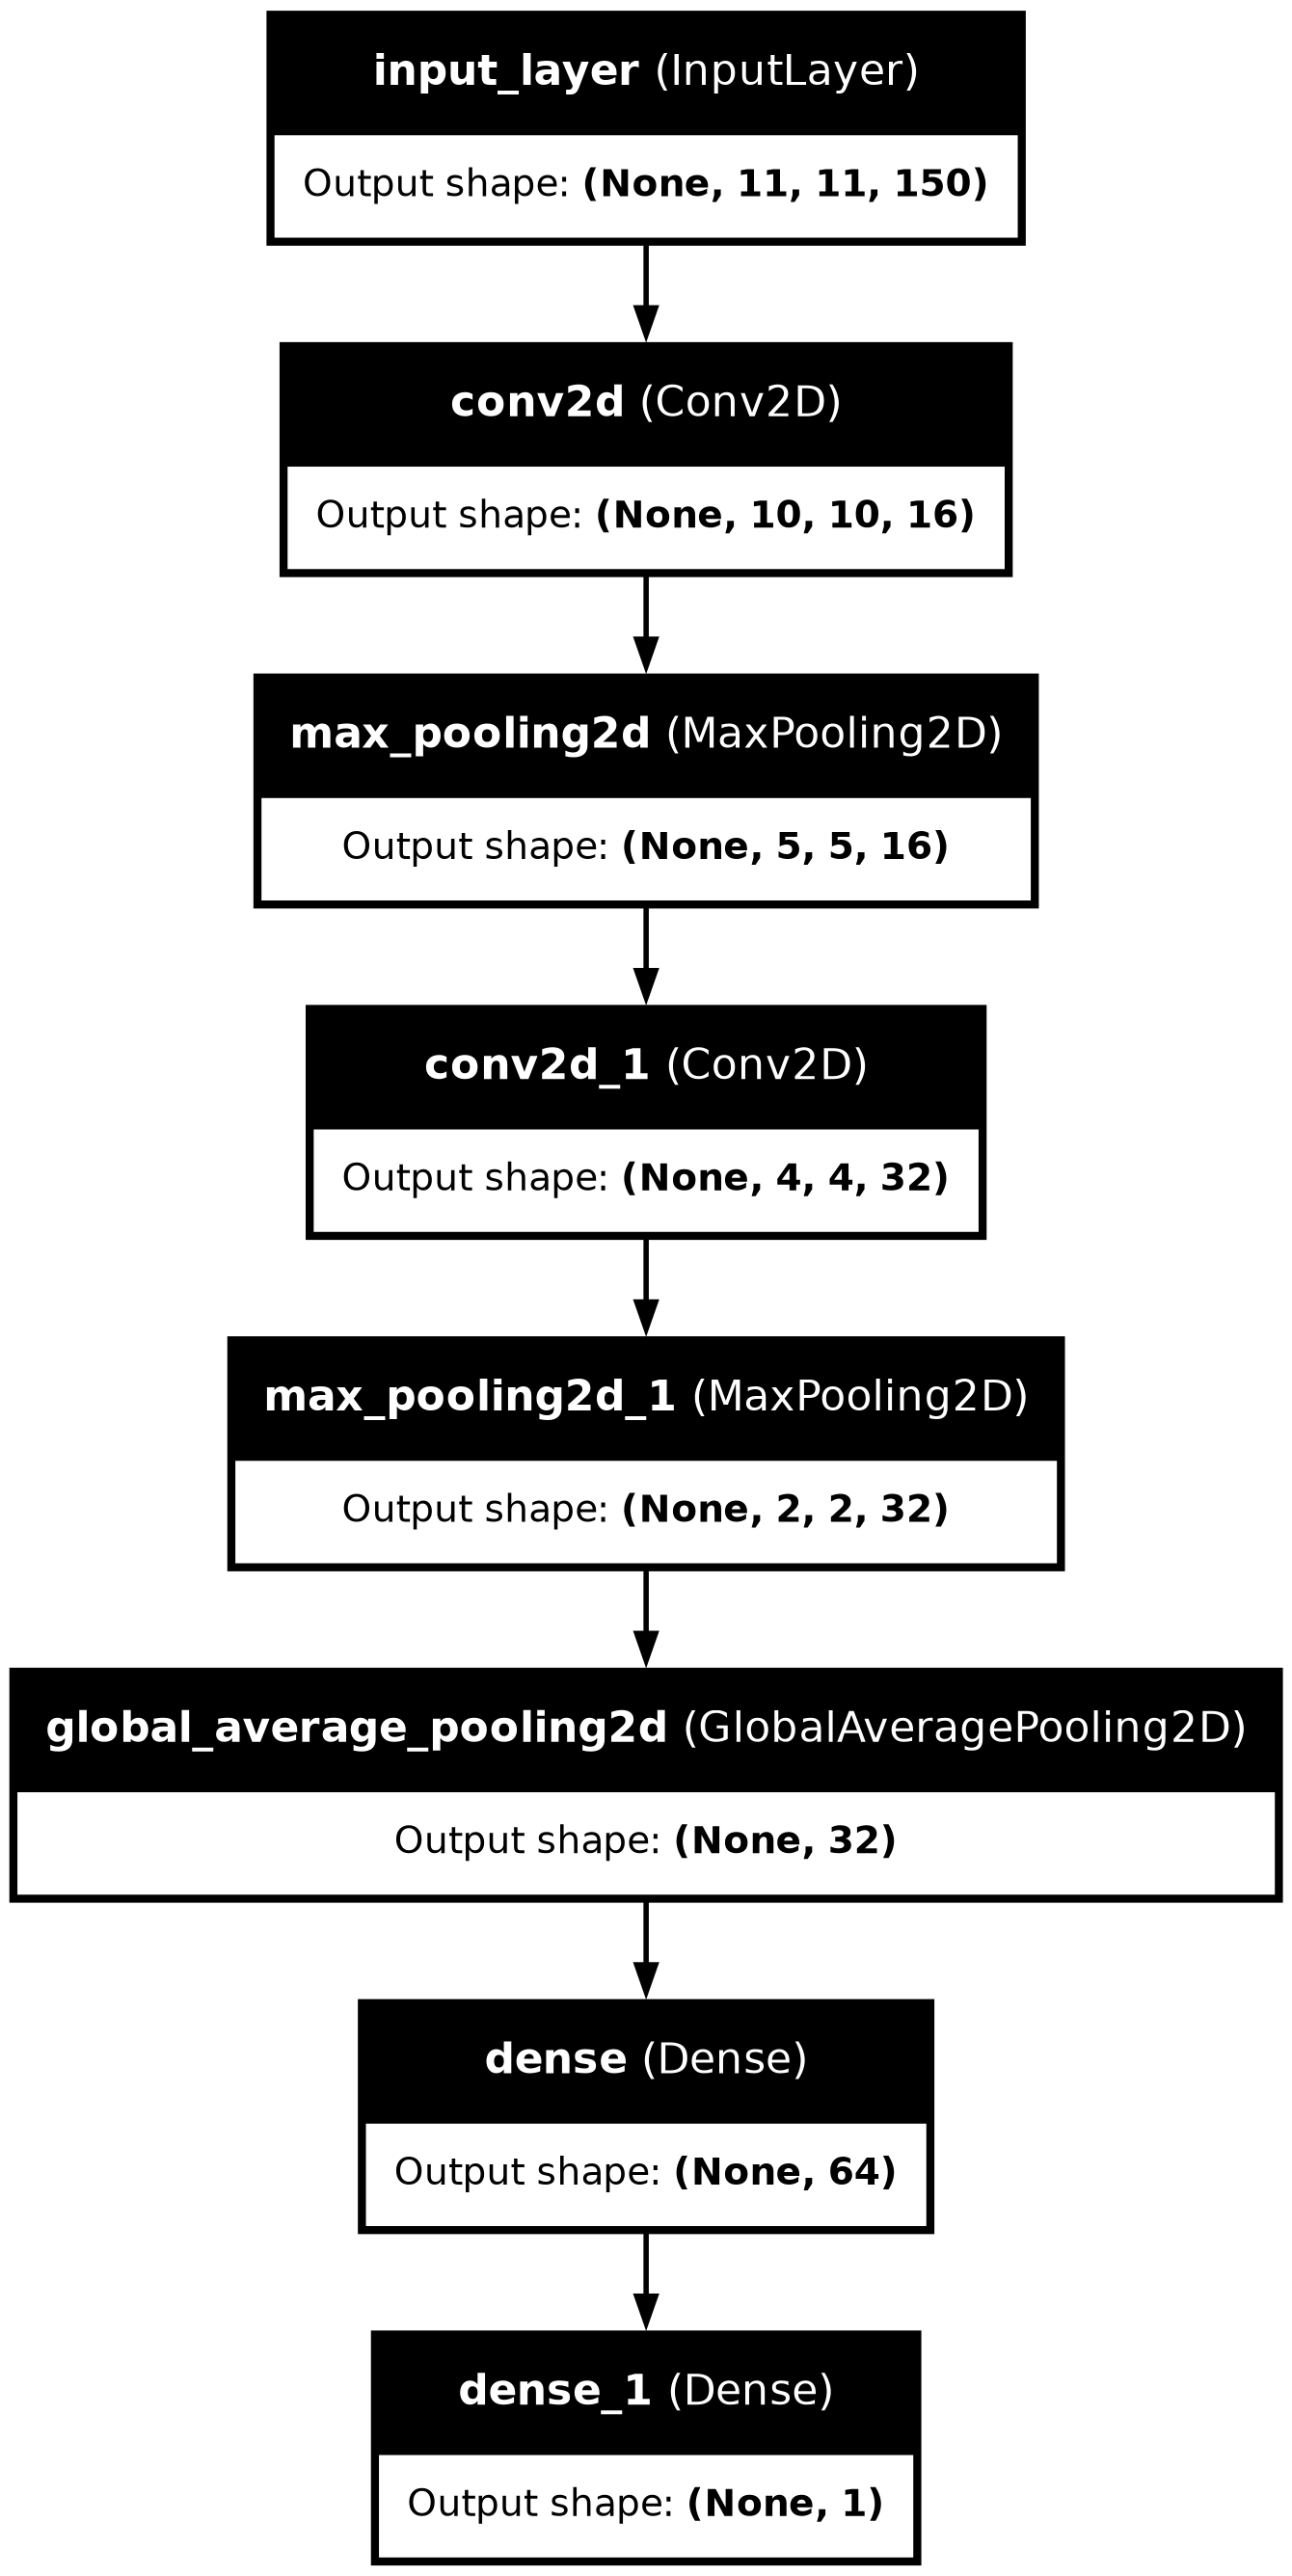

In [20]:
from tensorflow.keras.utils import plot_model

# Assuming you have defined your model as 'model' in your code

# Save the visualization to a file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [22]:
from sklearn.metrics import r2_score
predicted_labels = model.predict(train_images)

# Calculate R^2 score
r2 = r2_score(train_labels['K'], predicted_labels)

print("Train R^2 Score: {:.20f}".format(r2))

1835/1835 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Train R^2 Score: -0.00006202297396806777


In [ ]:
residuals = train_labels['K'] - predicted_labels

mse = mean_squared_error(train_labels['K'], predicted_labels)
std_err = np.sqrt(mse / (train_images.shape[0] - train_images.shape[1] - 1))

tests(residuals, std_err)
resi(train_labels['K'], predicted_labels)

In [23]:
predicted_labels = model.predict(val_images)

# Calculate R^2 score
r2 = r2_score(val_labels['K'], predicted_labels)

print("Validation R^2 Score: {:.20f}".format(r2))

459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation R^2 Score: -0.00005601550152189994


In [2]:
residuals = val_labels['K'].values - predicted_labels

mse = mean_squared_error(val_labels['K'].values, predicted_labels)
std_err = np.sqrt(mse / (val_images.shape[0] - val_images.shape[1] - 1))

# tests(residuals, std_err)
resi(val_labels['K'].values, predicted_labels)

In [ ]:
# import autokeras as ak

# # Initialize ImageClassifier
# clf = ak.ImageClassifier(overwrite=True, max_trials=10)

# # Train the classifier
# clf.fit(train_images, train_labels)

# # Evaluate the classifier
# accuracy = clf.evaluate(val_images, val_labels)
# print('Validation accuracy:', accuracy)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# def custom_cnn(input_shape):
#     model = models.Sequential([
#         layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(64, (3, 3), activation='relu'),
#         layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(64, (3, 3), activation='relu'),
#         layers.Flatten(),
#         layers.Dense(128, activation='relu')
#     ])
#     return model

# input_shape = (11, 11, 150)
# custom_cnn_model = custom_cnn(input_shape)

# # Remove the output layer (classifier)
# # feature_extractor = models.Model(inputs=custom_cnn_model.input, outputs=custom_cnn_model.layers[-2].output)
# features_train = feature_extractor.predict(train_images_array)


## Architechture 2 - Only CNN

In [ ]:
from sklearn.metrics import r2_score
from tensorflow.keras import layers, models

# Define the CNN model
def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#     model.add(layers.Conv2D(128, kernel_size=(2, 2), activation='relu'))
#     model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='linear')) 
    return model

# Create the CNN model
input_shape = (11, 11, 150)  # Shape of each image
cnn_model = create_cnn_model(input_shape)

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = cnn_model.fit(train_images, train_labels['K'], epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model on validation data
test_loss, test_mae = cnn_model.evaluate(val_images, val_labels['K'])
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Predict labels for validation data
predicted_labels = cnn_model.predict(val_images)

# Calculate R^2 score
r2 = r2_score(val_labels['K'], predicted_labels)
print("Validation R^2 Score:", r2)

## Architechture 3 - CNN + Linear Regression

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import r2_score

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(11, 11, 150)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
#     Dense(1, activation='linear')  # Output layer with one unit for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_images, train_labels['K'], epochs=100, batch_size=32, validation_data=(val_images, val_labels['K']))

# # Evaluate the model
# test_loss = model.evaluate(val_images, val_labels['K'])
# print("Test Loss:", test_loss)

# predicted_labels = model.predict(val_images)

# # Calculate R^2 score
# r2 = r2_score(val_labels['K'], predicted_labels)
# print("Validation R^2 Score:", r2)

Epoch 1/100
  74/1835 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 75550.5391  

I0000 00:00:1711395841.781337     972 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1835/1835 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 29592.1133 - val_loss: 22547.9062
Epoch 2/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 21696.6016 - val_loss: 20160.8730
Epoch 3/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 18980.0273 - val_loss: 14692.7920
Epoch 4/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 14304.1387 - val_loss: 9818.7725
Epoch 5/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8759.6504 - val_loss: 8806.3291
Epoch 6/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5088.0015 - val_loss: 4212.2002
Epoch 7/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4187.2739 - val_loss: 4211.8096
Epoch 8/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4147.1582 - val_loss: 4212.0928
Epoch 9/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4216.0059 - val_loss: 4211.8345
Epoch 10/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4179.9756 - val_loss: 4229.1069
Epoch 11/100
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/st

## Feature Extraction

In [20]:
feature_extractor = model
features_train = feature_extractor.predict(train_images)
features_val = feature_extractor.predict(val_images)

print(features_train.shape, features_val.shape)

1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(58717, 64) (14680, 64)


In [21]:
features_train_df = pd.DataFrame(features_train)
features_val_df = pd.DataFrame(features_val)

In [22]:
features_val_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,224.469742,224.472229,224.472183,224.448822,224.442352,224.454163,224.475235,224.461899,224.467117,224.474274,...,224.46611,224.470016,224.459167,224.469299,224.473618,224.471802,224.463287,224.450516,224.457916,224.450714
1,224.469742,224.472229,224.472183,224.448822,224.442352,224.454163,224.475235,224.461899,224.467117,224.474274,...,224.46611,224.470016,224.459167,224.469299,224.473618,224.471802,224.463287,224.450516,224.457916,224.450714
2,224.469742,224.472229,224.472183,224.448822,224.442352,224.454163,224.475235,224.461899,224.467117,224.474274,...,224.46611,224.470016,224.459167,224.469299,224.473618,224.471802,224.463287,224.450516,224.457916,224.450714
3,224.469742,224.472229,224.472183,224.448822,224.442352,224.454163,224.475235,224.461899,224.467117,224.474274,...,224.46611,224.470016,224.459167,224.469299,224.473618,224.471802,224.463287,224.450516,224.457916,224.450714
4,224.469742,224.472229,224.472183,224.448822,224.442352,224.454163,224.475235,224.461899,224.467117,224.474274,...,224.46611,224.470016,224.459167,224.469299,224.473618,224.471802,224.463287,224.450516,224.457916,224.450714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14675,224.469742,224.472229,224.472183,224.448822,224.442352,224.454163,224.475235,224.461899,224.467117,224.474274,...,224.46611,224.470016,224.459167,224.469299,224.473618,224.471802,224.463287,224.450516,224.457916,224.450714
14676,224.469742,224.472229,224.472183,224.448822,224.442352,224.454163,224.475235,224.461899,224.467117,224.474274,...,224.46611,224.470016,224.459167,224.469299,224.473618,224.471802,224.463287,224.450516,224.457916,224.450714
14677,224.469742,224.472229,224.472183,224.448822,224.442352,224.454163,224.475235,224.461899,224.467117,224.474274,...,224.46611,224.470016,224.459167,224.469299,224.473618,224.471802,224.463287,224.450516,224.457916,224.450714
14678,224.469742,224.472229,224.472183,224.448822,224.442352,224.454163,224.475235,224.461899,224.467117,224.474274,...,224.46611,224.470016,224.459167,224.469299,224.473618,224.471802,224.463287,224.450516,224.457916,224.450714


## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(features_train_df)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
features_train_df = pca.transform(features_train_df)
features_train_df = pd.DataFrame(features_train_df, columns=['PC{}'.format(i) for i in range(1, 21)])

In [ ]:
pca = PCA(n_components=20)
pca.fit(features_val_df)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
features_val_df = pca.transform(features_val_df)
features_val_df = pd.DataFrame(features_val_df, columns=['PC{}'.format(i) for i in range(1, 21)])

## Evaluation

In [23]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(features_train_df, train_labels['K'])

# Evaluate the model
train_score = regressor.score(features_train_df,  train_labels['K'])
val_score = regressor.score(features_val_df, val_labels['K'])

print("Training R^2 Score:", train_score)
print("Validation R^2 Score:", val_score)

Training R^2 Score: -0.0005229565320332696
Validation R^2 Score: -0.7353521324632155


Shapiro-Wilk Test:
Test Statistic: 0.9224059439185159
p-value: 4.0923522368247055e-94
Null hypothesis (residuals are normally distributed) rejected.

Anderson-Darling Test:
Test Statistic: 895.5593069596434
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Null hypothesis (residuals are normally distributed) rejected.

Cramer Von Mises Test:
Test Statistic: 5259.893069138719
p-value: 0
Null hypothesis (residuals are normally distributed) rejected.

Kolmogorov-Smirnov Test:
Test Statistic: 0.5792855800329033
p-value: 0.0
Null hypothesis (residuals are normally distributed) rejected.

Shapiro Francia Test:
Test Statistic: 0.9224059439185159
p-value: 4.0923522368247055e-94
Null hypothesis (residuals are normally distributed) rejected.


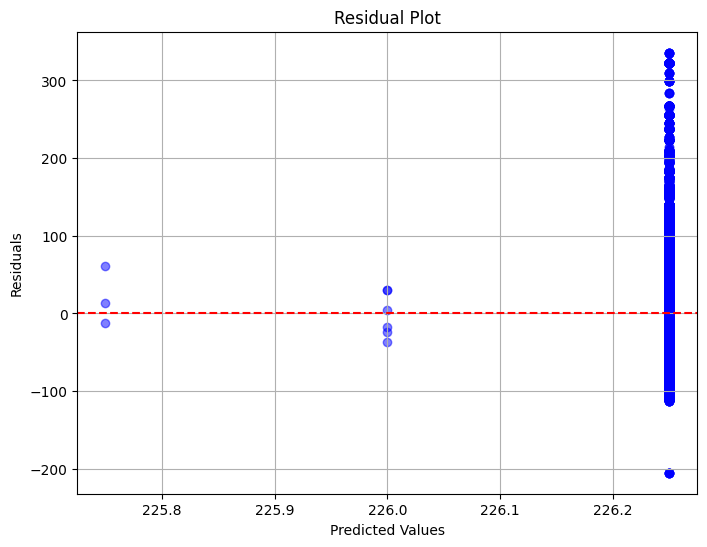

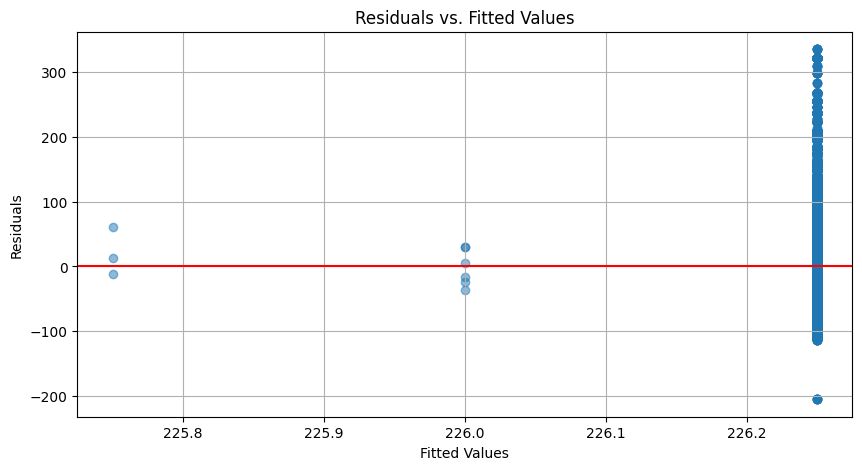

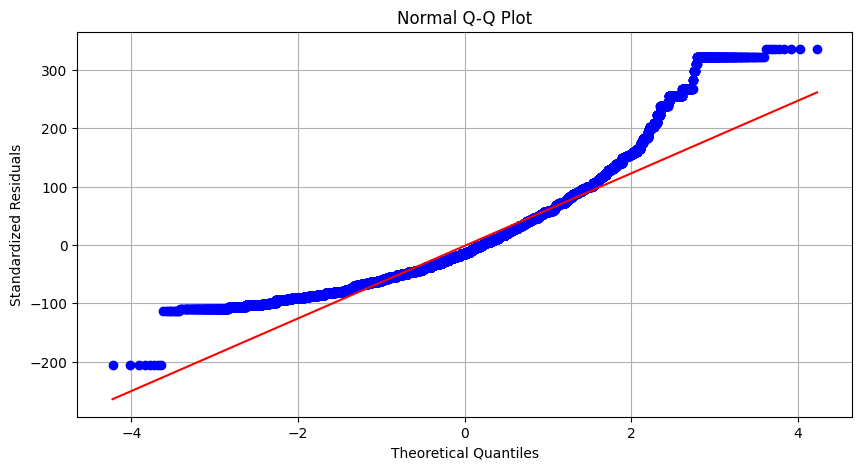

In [24]:
train_labels_K = regressor.predict(features_train_df)
residuals = train_labels['K'] - train_labels_K

mse = mean_squared_error(train_labels['K'], train_labels_K)
std_err = np.sqrt(mse / (features_train_df.shape[0] - features_train_df.shape[1] - 1))

tests(residuals, std_err)
resi(train_labels['K'], train_labels_K)

Shapiro-Wilk Test:
Test Statistic: 0.5667237026373357
p-value: 3.74330040775171e-104
Null hypothesis (residuals are normally distributed) rejected.

Anderson-Darling Test:
Test Statistic: 500.10059128932335
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Null hypothesis (residuals are normally distributed) rejected.

Cramer Von Mises Test:
Test Statistic: 1289.3263921939754
p-value: 2.655764005377037e-07
Null hypothesis (residuals are normally distributed) rejected.

Kolmogorov-Smirnov Test:
Test Statistic: 0.5665021171442726
p-value: 0.0
Null hypothesis (residuals are normally distributed) rejected.

Shapiro Francia Test:
Test Statistic: 0.5667237026373357
p-value: 3.74330040775171e-104
Null hypothesis (residuals are normally distributed) rejected.


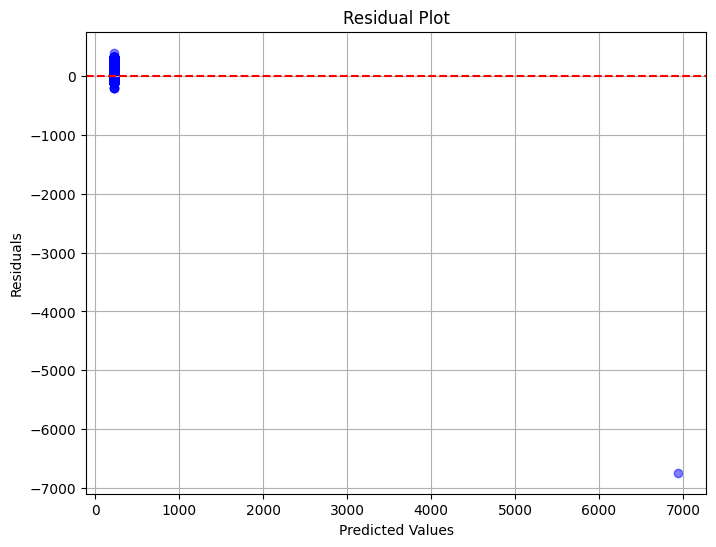

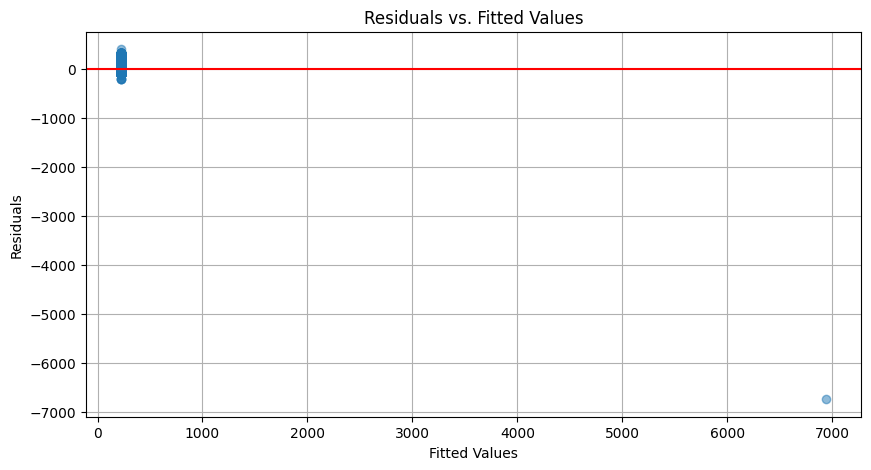

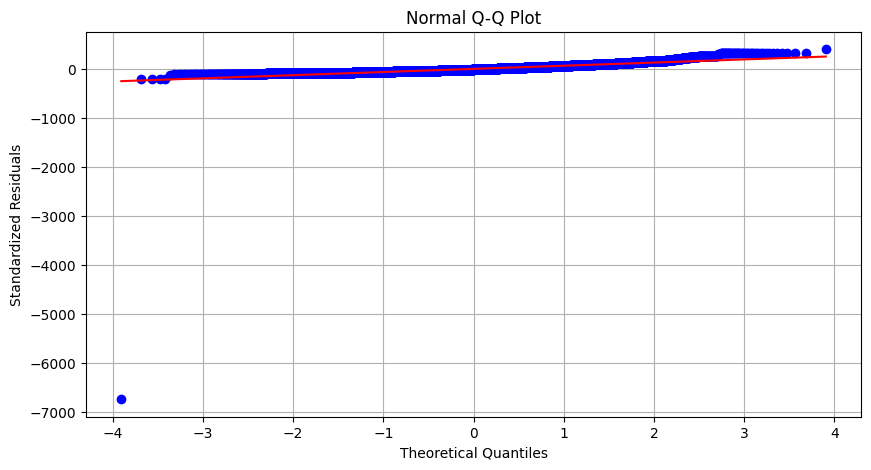

In [25]:
val_labels_K = regressor.predict(features_val_df)
residuals = val_labels['K'] - val_labels_K

mse = mean_squared_error(val_labels['K'], val_labels_K)
std_err = np.sqrt(mse / (features_val_df.shape[0] - features_val_df.shape[1] - 1))

tests(residuals, std_err)
resi(val_labels['K'], val_labels_K)